# Data Pre-Processing --- Date-Time Column 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading Dataset

In [14]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [15]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

### Date columns

In [16]:
df[['ScheduledDay','AppointmentDay']]

ScheduledDay        AppointmentDay
0       2016-04-29T18:38:08Z  2016-04-29T00:00:00Z
1       2016-04-29T16:08:27Z  2016-04-29T00:00:00Z
2       2016-04-29T16:19:04Z  2016-04-29T00:00:00Z
3       2016-04-29T17:29:31Z  2016-04-29T00:00:00Z
4       2016-04-29T16:07:23Z  2016-04-29T00:00:00Z
...                      ...                   ...
110522  2016-05-03T09:15:35Z  2016-06-07T00:00:00Z
110523  2016-05-03T07:27:33Z  2016-06-07T00:00:00Z
110524  2016-04-27T16:03:52Z  2016-06-07T00:00:00Z
110525  2016-04-27T15:09:23Z  2016-06-07T00:00:00Z
110526  2016-04-27T13:30:56Z  2016-06-07T00:00:00Z

[110527 rows x 2 columns]

### converting in '%Y-%m-%dT%H:%M:%SZ' format

In [17]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format = '%Y-%m-%dT%H:%M:%SZ',errors = 'coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format = '%Y-%m-%dT%H:%M:%SZ',errors = 'coerce')

In [18]:
df[['ScheduledDay','AppointmentDay']]

ScheduledDay AppointmentDay
0      2016-04-29 18:38:08     2016-04-29
1      2016-04-29 16:08:27     2016-04-29
2      2016-04-29 16:19:04     2016-04-29
3      2016-04-29 17:29:31     2016-04-29
4      2016-04-29 16:07:23     2016-04-29
...                    ...            ...
110522 2016-05-03 09:15:35     2016-06-07
110523 2016-05-03 07:27:33     2016-06-07
110524 2016-04-27 16:03:52     2016-06-07
110525 2016-04-27 15:09:23     2016-06-07
110526 2016-04-27 13:30:56     2016-06-07

[110527 rows x 2 columns]

In [19]:
df.ScheduledDay.isnull().sum()

0

In [20]:
df.ScheduledDay.head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

### there are some appointments that were scheduled after the appointment datetime

In [21]:
(df.ScheduledDay > df.AppointmentDay).sum()

38568

### shifting all the appointment times to the end of the day i.e. 23:59:59

In [22]:
df['AppointmentDay'] = df['AppointmentDay'] +pd.Timedelta('1d') - pd.Timedelta('1s')

In [23]:
df['AppointmentDay'].head()

0   2016-04-29 23:59:59
1   2016-04-29 23:59:59
2   2016-04-29 23:59:59
3   2016-04-29 23:59:59
4   2016-04-29 23:59:59
Name: AppointmentDay, dtype: datetime64[ns]

### only 5 rows where scheduledDay time is after appointmentDay

In [24]:
(df.ScheduledDay > df.AppointmentDay).sum()

5

### not considering those rows

In [25]:
df1 = df.loc[(df['ScheduledDay']<df['AppointmentDay'])].copy()

In [26]:
df1[['ScheduledDay','AppointmentDay','No-show']]

ScheduledDay      AppointmentDay No-show
0      2016-04-29 18:38:08 2016-04-29 23:59:59      No
1      2016-04-29 16:08:27 2016-04-29 23:59:59      No
2      2016-04-29 16:19:04 2016-04-29 23:59:59      No
3      2016-04-29 17:29:31 2016-04-29 23:59:59      No
4      2016-04-29 16:07:23 2016-04-29 23:59:59      No
...                    ...                 ...     ...
110522 2016-05-03 09:15:35 2016-06-07 23:59:59      No
110523 2016-05-03 07:27:33 2016-06-07 23:59:59      No
110524 2016-04-27 16:03:52 2016-06-07 23:59:59      No
110525 2016-04-27 15:09:23 2016-06-07 23:59:59      No
110526 2016-04-27 13:30:56 2016-06-07 23:59:59      No

[110522 rows x 3 columns]

## Different datetime features

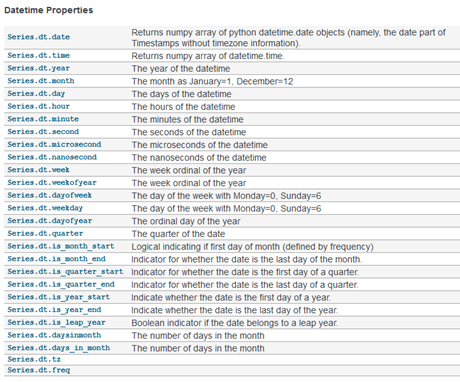
- dt.year
- dt.month
- dt.day
- dt.week
- dt.hour
- dt.minute
- dt.dayofweek

In [27]:
df1["ScheduledDay_year"] = df1["ScheduledDay"].dt.year
df1["ScheduledDay_month"] = df1["ScheduledDay"].dt.month
df1["ScheduledDay_week"] = df1["ScheduledDay"].dt.week
df1["ScheduledDay_day"] = df1["ScheduledDay"].dt.day
df1["ScheduledDay_hour"] = df1["ScheduledDay"].dt.hour
df1["ScheduledDay_minute"] = df1["ScheduledDay"].dt.minute
df1["ScheduledDay_dayofweek"] = df1["ScheduledDay"].dt.dayofweek


df1["AppointmentDay_year"] = df1["AppointmentDay"].dt.year
df1["AppointmentDay_month"] = df1["AppointmentDay"].dt.month
df1["AppointmentDay_week"] = df1["AppointmentDay"].dt.week
df1["AppointmentDay_day"] = df1["AppointmentDay"].dt.day
df1["AppointmentDay_hour"] = df1["AppointmentDay"].dt.hour
df1["AppointmentDay_minute"] = df1["AppointmentDay"].dt.minute
df1["AppointmentDay_dayofweek"] = df1["AppointmentDay"].dt.dayofweek

<ipython-input-27-ce79760d3313>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1["ScheduledDay_week"] = df1["ScheduledDay"].dt.week
<ipython-input-27-ce79760d3313>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1["AppointmentDay_week"] = df1["AppointmentDay"].dt.week


In [28]:
df1.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledDay_year', 'ScheduledDay_month', 'ScheduledDay_week',
       'ScheduledDay_day', 'ScheduledDay_hour', 'ScheduledDay_minute',
       'ScheduledDay_dayofweek', 'AppointmentDay_year', 'AppointmentDay_month',
       'AppointmentDay_week', 'AppointmentDay_day', 'AppointmentDay_hour',
       'AppointmentDay_minute', 'AppointmentDay_dayofweek'],
      dtype='object')

In [29]:
df1[['ScheduledDay_year', 'ScheduledDay_month',
       'ScheduledDay_week', 'ScheduledDay_day', 'ScheduledDay_hour',
       'ScheduledDay_minute', 'ScheduledDay_dayofweek', 'AppointmentDay_year',
       'AppointmentDay_month', 'AppointmentDay_week', 'AppointmentDay_day',
       'AppointmentDay_hour', 'AppointmentDay_minute',
       'AppointmentDay_dayofweek']]

ScheduledDay_year  ScheduledDay_month  ScheduledDay_week  \
0                    2016                   4                 17   
1                    2016                   4                 17   
2                    2016                   4                 17   
3                    2016                   4                 17   
4                    2016                   4                 17   
...                   ...                 ...                ...   
110522               2016                   5                 18   
110523               2016                   5                 18   
110524               2016                   4                 17   
110525               2016                   4                 17   
110526               2016                   4                 17   

        ScheduledDay_day  ScheduledDay_hour  ScheduledDay_minute  \
0                     29                 18                   38   
1                     29                 16                    8   
2                     29                 16                   19   
3                     29                 17                   29   
4                     29                 16                    7   
...                  ...                ...                  ...   
110522                 3                  9                   15   
110523                 3                  7                   27   
110524                27                 16                    3   
110525                27                 15                    9   
110526                27                 13                   30   

        ScheduledDay_dayofweek  AppointmentDay_year  AppointmentDay_month  \
0                            4                 2016                     4   
1                            4                 2016                     4   
2                            4                 2016                     4   
3                            4                 2016                     4   
4                            4                 2016                     4   
...                        ...                  ...                   ...   
110522                       1                 2016                     6   
110523                       1                 2016                     6   
110524                       2                 2016                     6   
110525                       2                 2016                     6   
110526                       2                 2016                     6   

        AppointmentDay_week  AppointmentDay_day  AppointmentDay_hour  \
0                        17                  29                   23   
1                        17                  29                   23   
2                        17                  29                   23   
3                        17                  29                   23   
4                        17                  29                   23   
...                     ...                 ...                  ...   
110522                   23                   7                   23   
110523                   23                   7                   23   
110524                   23                   7                   23   
110525                   23                   7                   23   
110526                   23                   7                   23   

        AppointmentDay_minute  AppointmentDay_dayofweek  
0                          59                         4  
1                          59                         4  
2                          59                         4  
3                          59                         4  
4                          59                         4  
...                       ...                       ...  
110522                     59                         1  
110523                     59                         1  
110524                     59                         1  
1105

### Little more analysis

In [30]:
df1.groupby('AppointmentDay_year').size()

AppointmentDay_year
2016    110522
dtype: int64

In [31]:
df1.groupby('AppointmentDay_month').size()

AppointmentDay_month
4     3235
5    80836
6    26451
dtype: int64

In [32]:
df1.groupby('AppointmentDay_dayofweek').size()

AppointmentDay_dayofweek
0    22714
1    25638
2    25866
3    17246
4    19019
5       39
dtype: int64

### calculating the ‘time’ between datetimes i.e. creating a new feature that is the number of days between the scheduled date and the appointment date.

In [35]:
df1['delta_days'] = (df1['AppointmentDay']-df1['ScheduledDay']).dt.total_seconds()/(60*60*24)

In [36]:
df1['delta_days']

0          0.223507
1          0.327454
2          0.320081
3          0.271157
4          0.328194
            ...    
110522    35.614167
110523    35.689190
110524    41.330637
110525    41.368472
110526    41.436840
Name: delta_days, Length: 110522, dtype: float64

In [37]:
df1['No-show'].value_counts()

No     88208
Yes    22314
Name: No-show, dtype: int64

### Day with appointment chart 

In [38]:
import plotly.express as px

px.histogram(df1, x='delta_days', color= 'No-show')

# Most of the patients who did not miss their appointment scheduled the appointment on the same day.